### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Read in and display the image

In [3]:
# read the image
image = cv2.imread('images/pizza.png')

# print image info
print('This image is: ', type(image), 'with dimentsions: ', image.shape)

This image is:  <class 'numpy.ndarray'> with dimentsions:  (414, 650, 3)


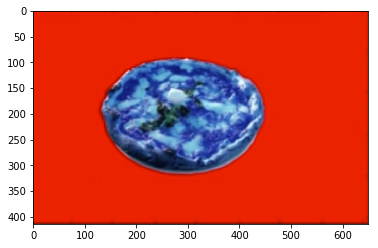

In [4]:
%matplotlib inline

# Display the image
plt.imshow(image)

#### Why BGR instead of RGB?
OpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. The red channel was considered one of the least important color channels, so was listed last, and many bitmaps use BGR format for image storage. However, now the standard has changed and most image software and cameras use RGB format, which is why, in these examples, it's good practice to initially convert BGR images to RGB before analyzing or manipulating them.

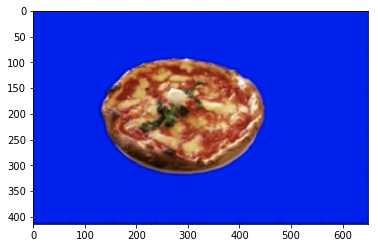

In [5]:
# make a copy of the image
image_copy = np.copy(image)

# change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# display image
plt.imshow(image_copy)

### Define the color threshold

In [6]:
# define the color selection boundaries in RGB values
lower_blue = np.array([0,0,140])
upper_blue = np.array([50,70,295])

### Create a mask

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255   0]
 [255 255 255 ...,   0   0   0]]


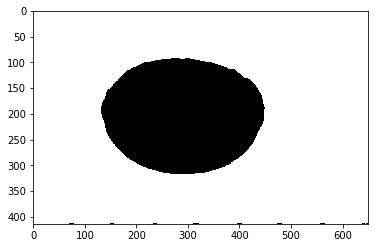

In [8]:
# define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# visualize the mask
print(mask)
plt.imshow(mask, cmap='gray')

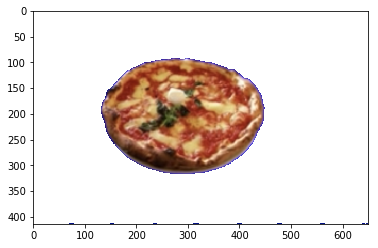

In [14]:
# let the pizza show through instead of the black mask
masked_image = np.copy(image_copy)

masked_image[mask !=0] = [255,255,255]
masked_image[mask !=0] = [255,255,255]

# display it
# print(masked_image)
plt.imshow(masked_image)

### Mask and add a background image

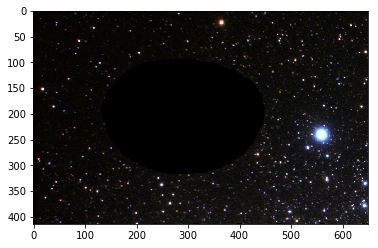

In [8]:
# load in a background image, and convert to RGB
background_image = cv2.imread('space.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# crop it to the right size (414, 650)
crop_background = background_image[0:414, 0:650]

# mask the cropped background so that the pizza area is blocked
crop_background[mask ==0] = [0,0,0]

plt.imshow(crop_background)
# crop_background.shape

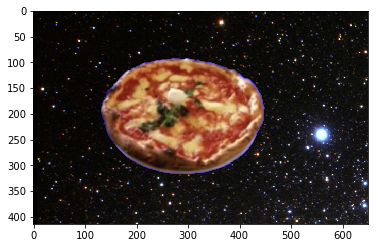

In [9]:
# add the two images togethers
complete_image = crop_background + masked_image

plt.imshow(complete_image)